In [1]:
from google.colab import drive
import os 
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO
from roboflow import Roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.7/303.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9a1c0c0ab8bc3dcf76b3607d5686da36138f0f2c5424623f4af532d73cd8d805
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
  

In [15]:
from IPython.display import Image

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Create Directories In Drive

root_dir = "/content/drive/MyDrive/"

project_folder = "Colab Notebooks/Gun-Detection-Trial"

def create_and_set_working_directory(project_folder):
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' was created.')

  os.chdir(root_dir + project_folder)
  
  
  print('\nYour working directory is now' + root_dir + project_folder)

create_and_set_working_directory(project_folder)

/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial was created.

Your working directory is now/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial


In [ ]:
#Download Dataset

rf = Roboflow(api_key="NKC61v2nD2vvNaCGyRJK")
project = rf.workspace("kevin-djong-x3dga").project("gun-detection-jh8fj")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.49, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Gun-Detection-1 in yolov8:: 100%|██████████| 5954/5954 [00:36<00:00, 161.64it/s]


In [ ]:
# load a pretrained model (recommended for training)
model = YOLO("yolov8x.pt")  

  0%|          | 0.00/131M [00:00<?, ?B/s]

In [ ]:
# train the model
results = model.train(data="/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/data.yaml", epochs=25, imgsz=640)  # train the mode

Ultralytics YOLOv8.0.49 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.Conv                  [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.Conv                  [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.C2f                   [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.Conv                  [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.C2f                   [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.Conv                  [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.C2f                   [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

In [ ]:
# Load a model based on the trained weight 

model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
#Validate the model

results = model.val(data="/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/data.yaml")  

Ultralytics YOLOv8.0.49 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/valid/labels.cache... 594 images, 0 backgrounds, 0 corrupt: 100%|██████████| 594/594 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [01:05<00:00,  1.72s/it]
                   all        594        682      0.895      0.836      0.911      0.722
Speed: 1.7ms preprocess, 97.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val


Validate Batches

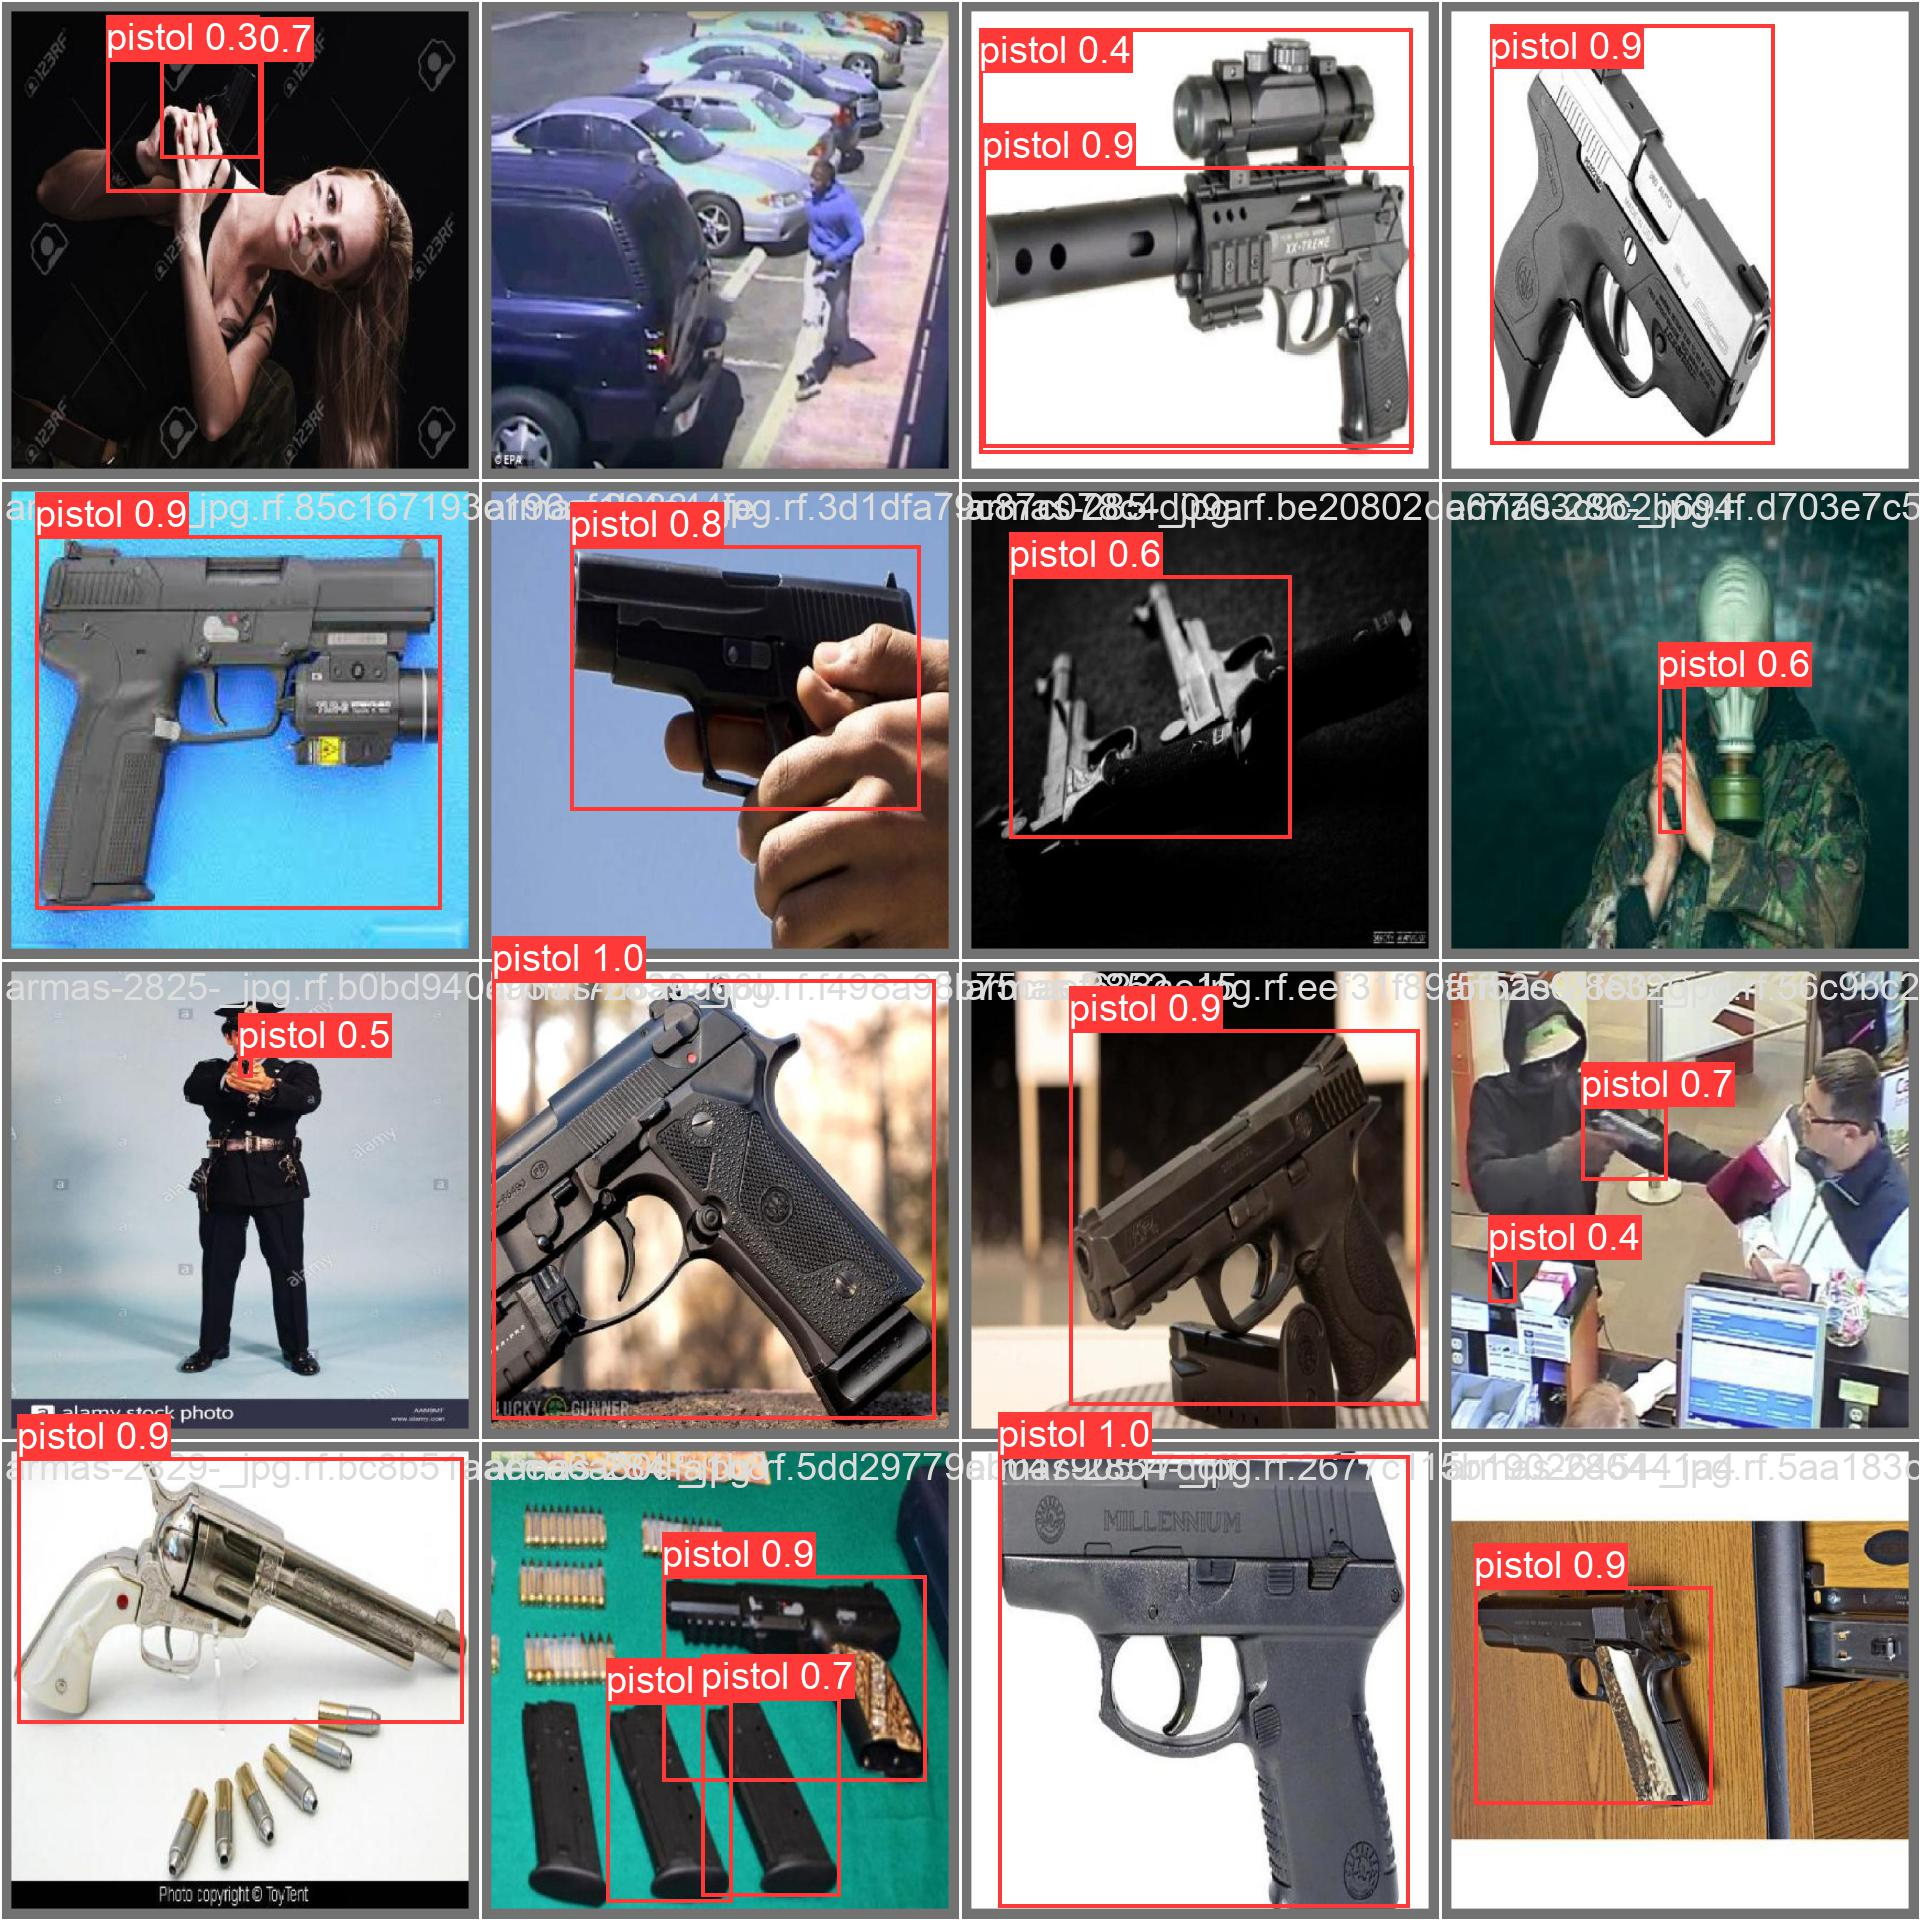

In [16]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/val/val_batch0_pred.jpg', width=500)

In [ ]:
# Test the model

results = model.predict(source="/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/images", save=True)


image 1/297 /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/images/armas-1005-_jpg.rf.0c63cce3f42bd1f1a37a2583c6069783.jpg: 640x640 1 pistol, 93.4ms
image 2/297 /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/images/armas-1010-_jpg.rf.e22e65e1c21e5ca0f4d072fbf5db5fc7.jpg: 640x640 1 pistol, 92.2ms
image 3/297 /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/images/armas-1013-_jpg.rf.4a26720b3623bde4a6d89fceab33ac29.jpg: 640x640 1 pistol, 103.0ms
image 4/297 /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/images/armas-1017-_jpg.rf.4747fa3a027712075ee7a61cd3313f7f.jpg: 640x640 1 pistol, 80.4ms
image 5/297 /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/images/armas-1019-_jpg.rf.44b414c09eaf4f0a8fb9541b7c69e412.jpg: 640x640 1 pistol, 79.9ms
image 6/297 /content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/Gun-Detection-1/test/i

# Metric


Train Result

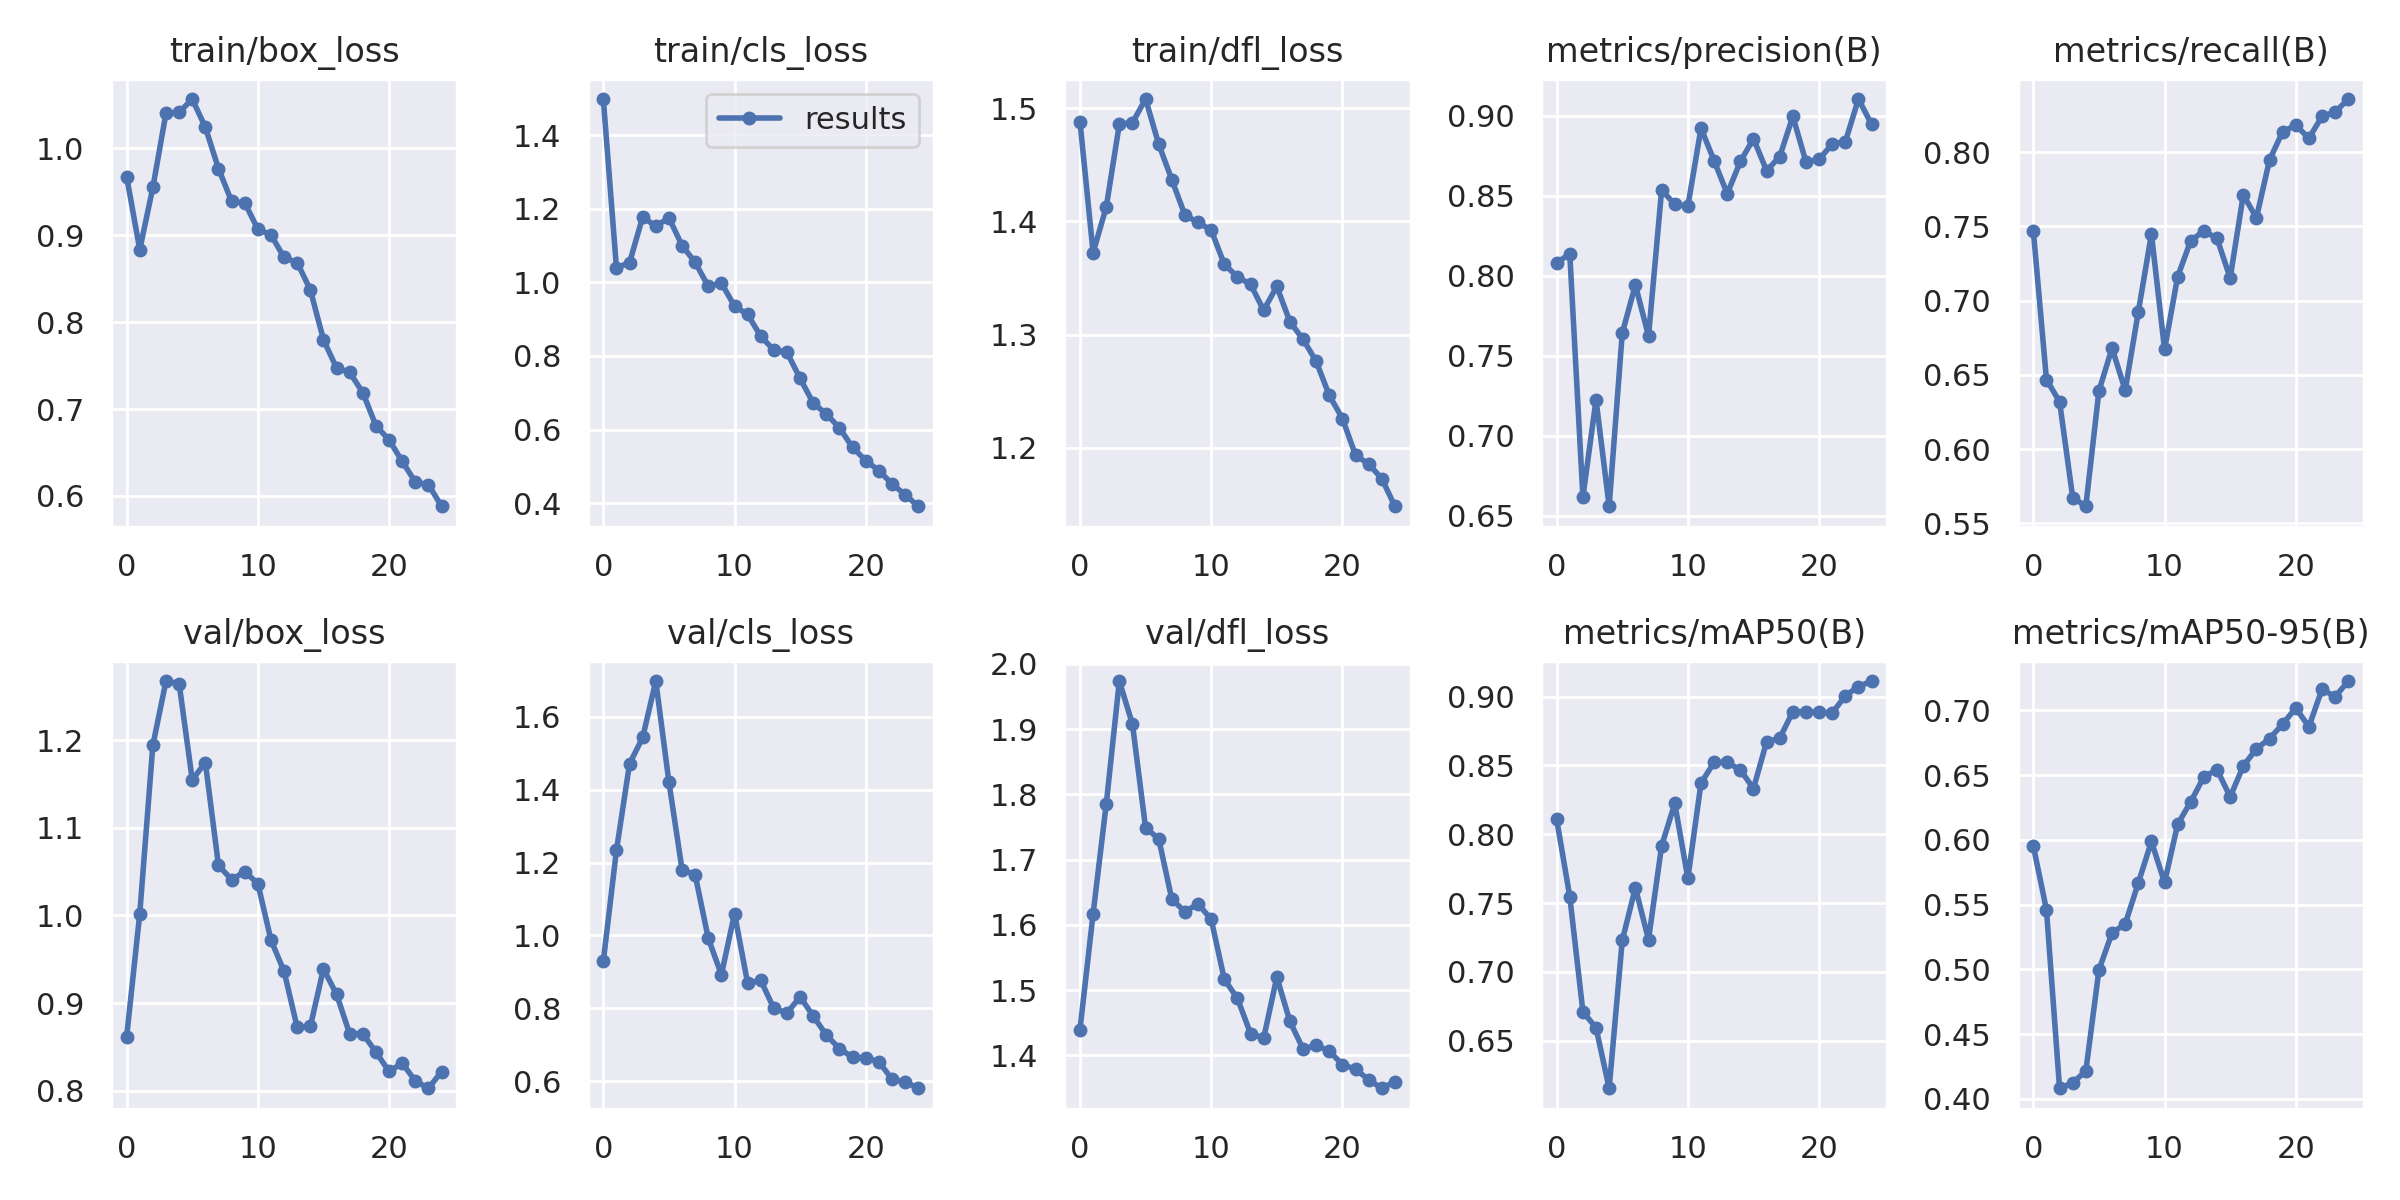

In [7]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/train/results.png', width=900) 

Confusion Matrix

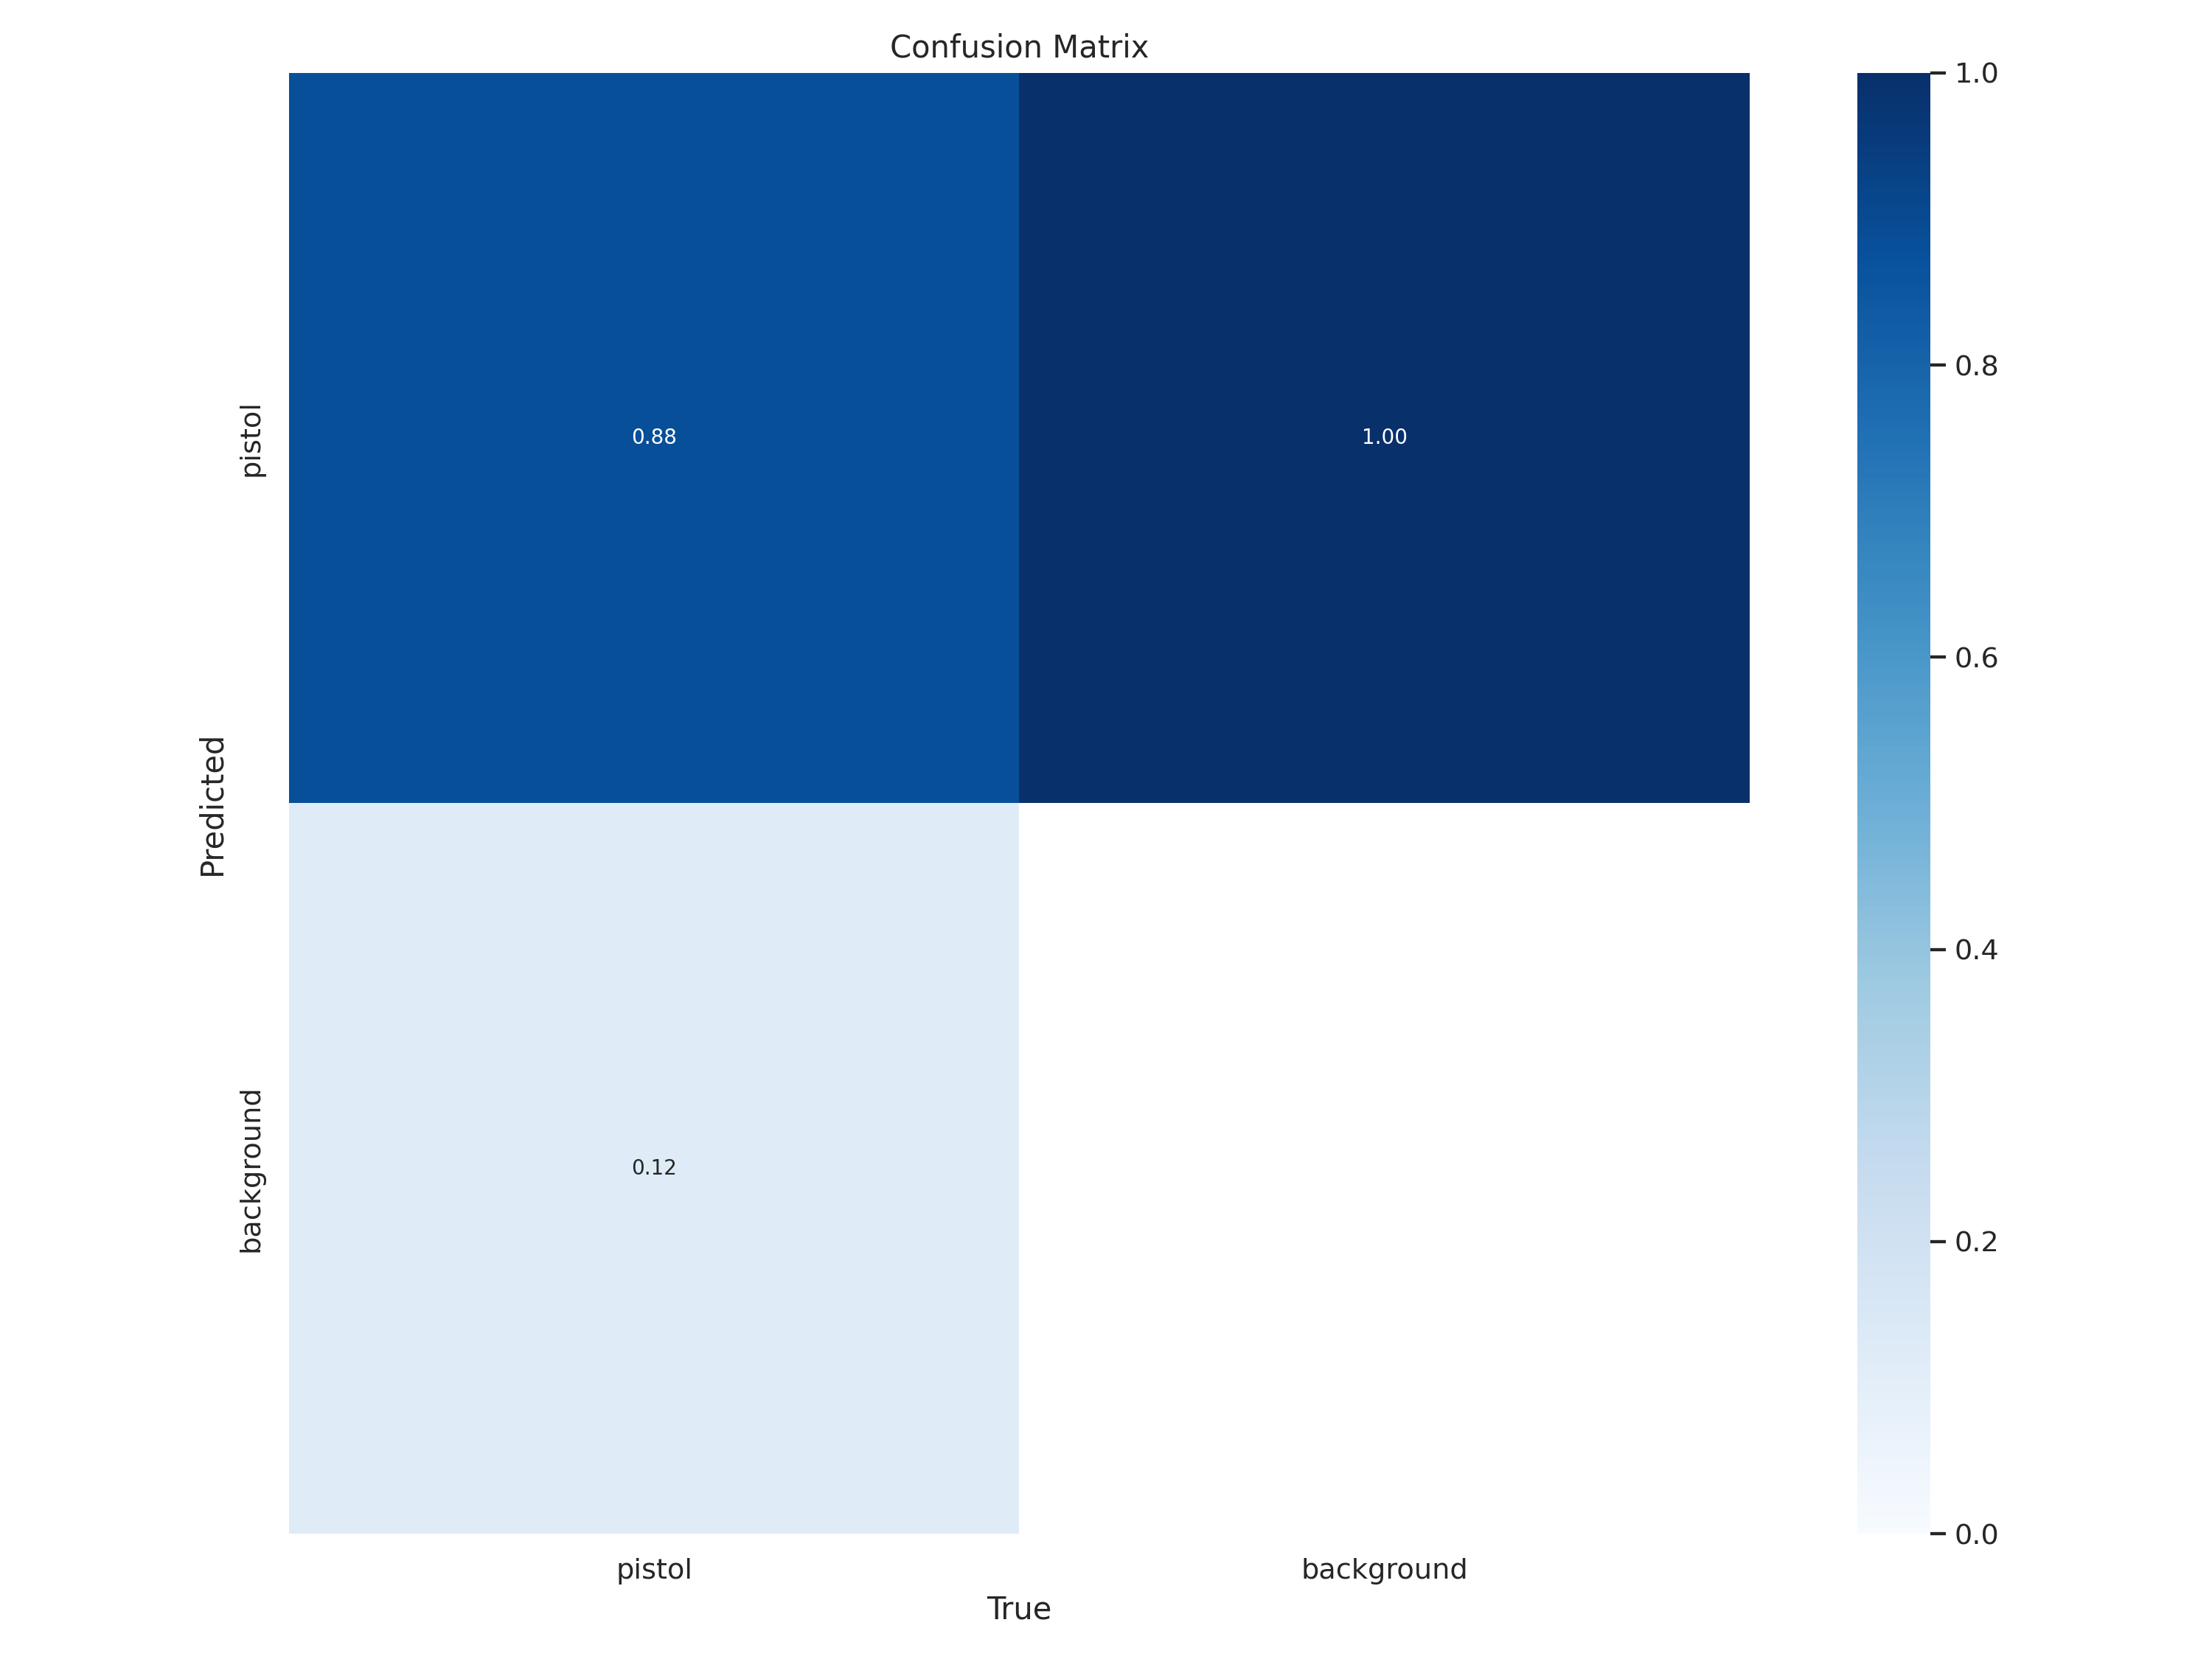

In [14]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/val/confusion_matrix.png', width=500) 

Precision

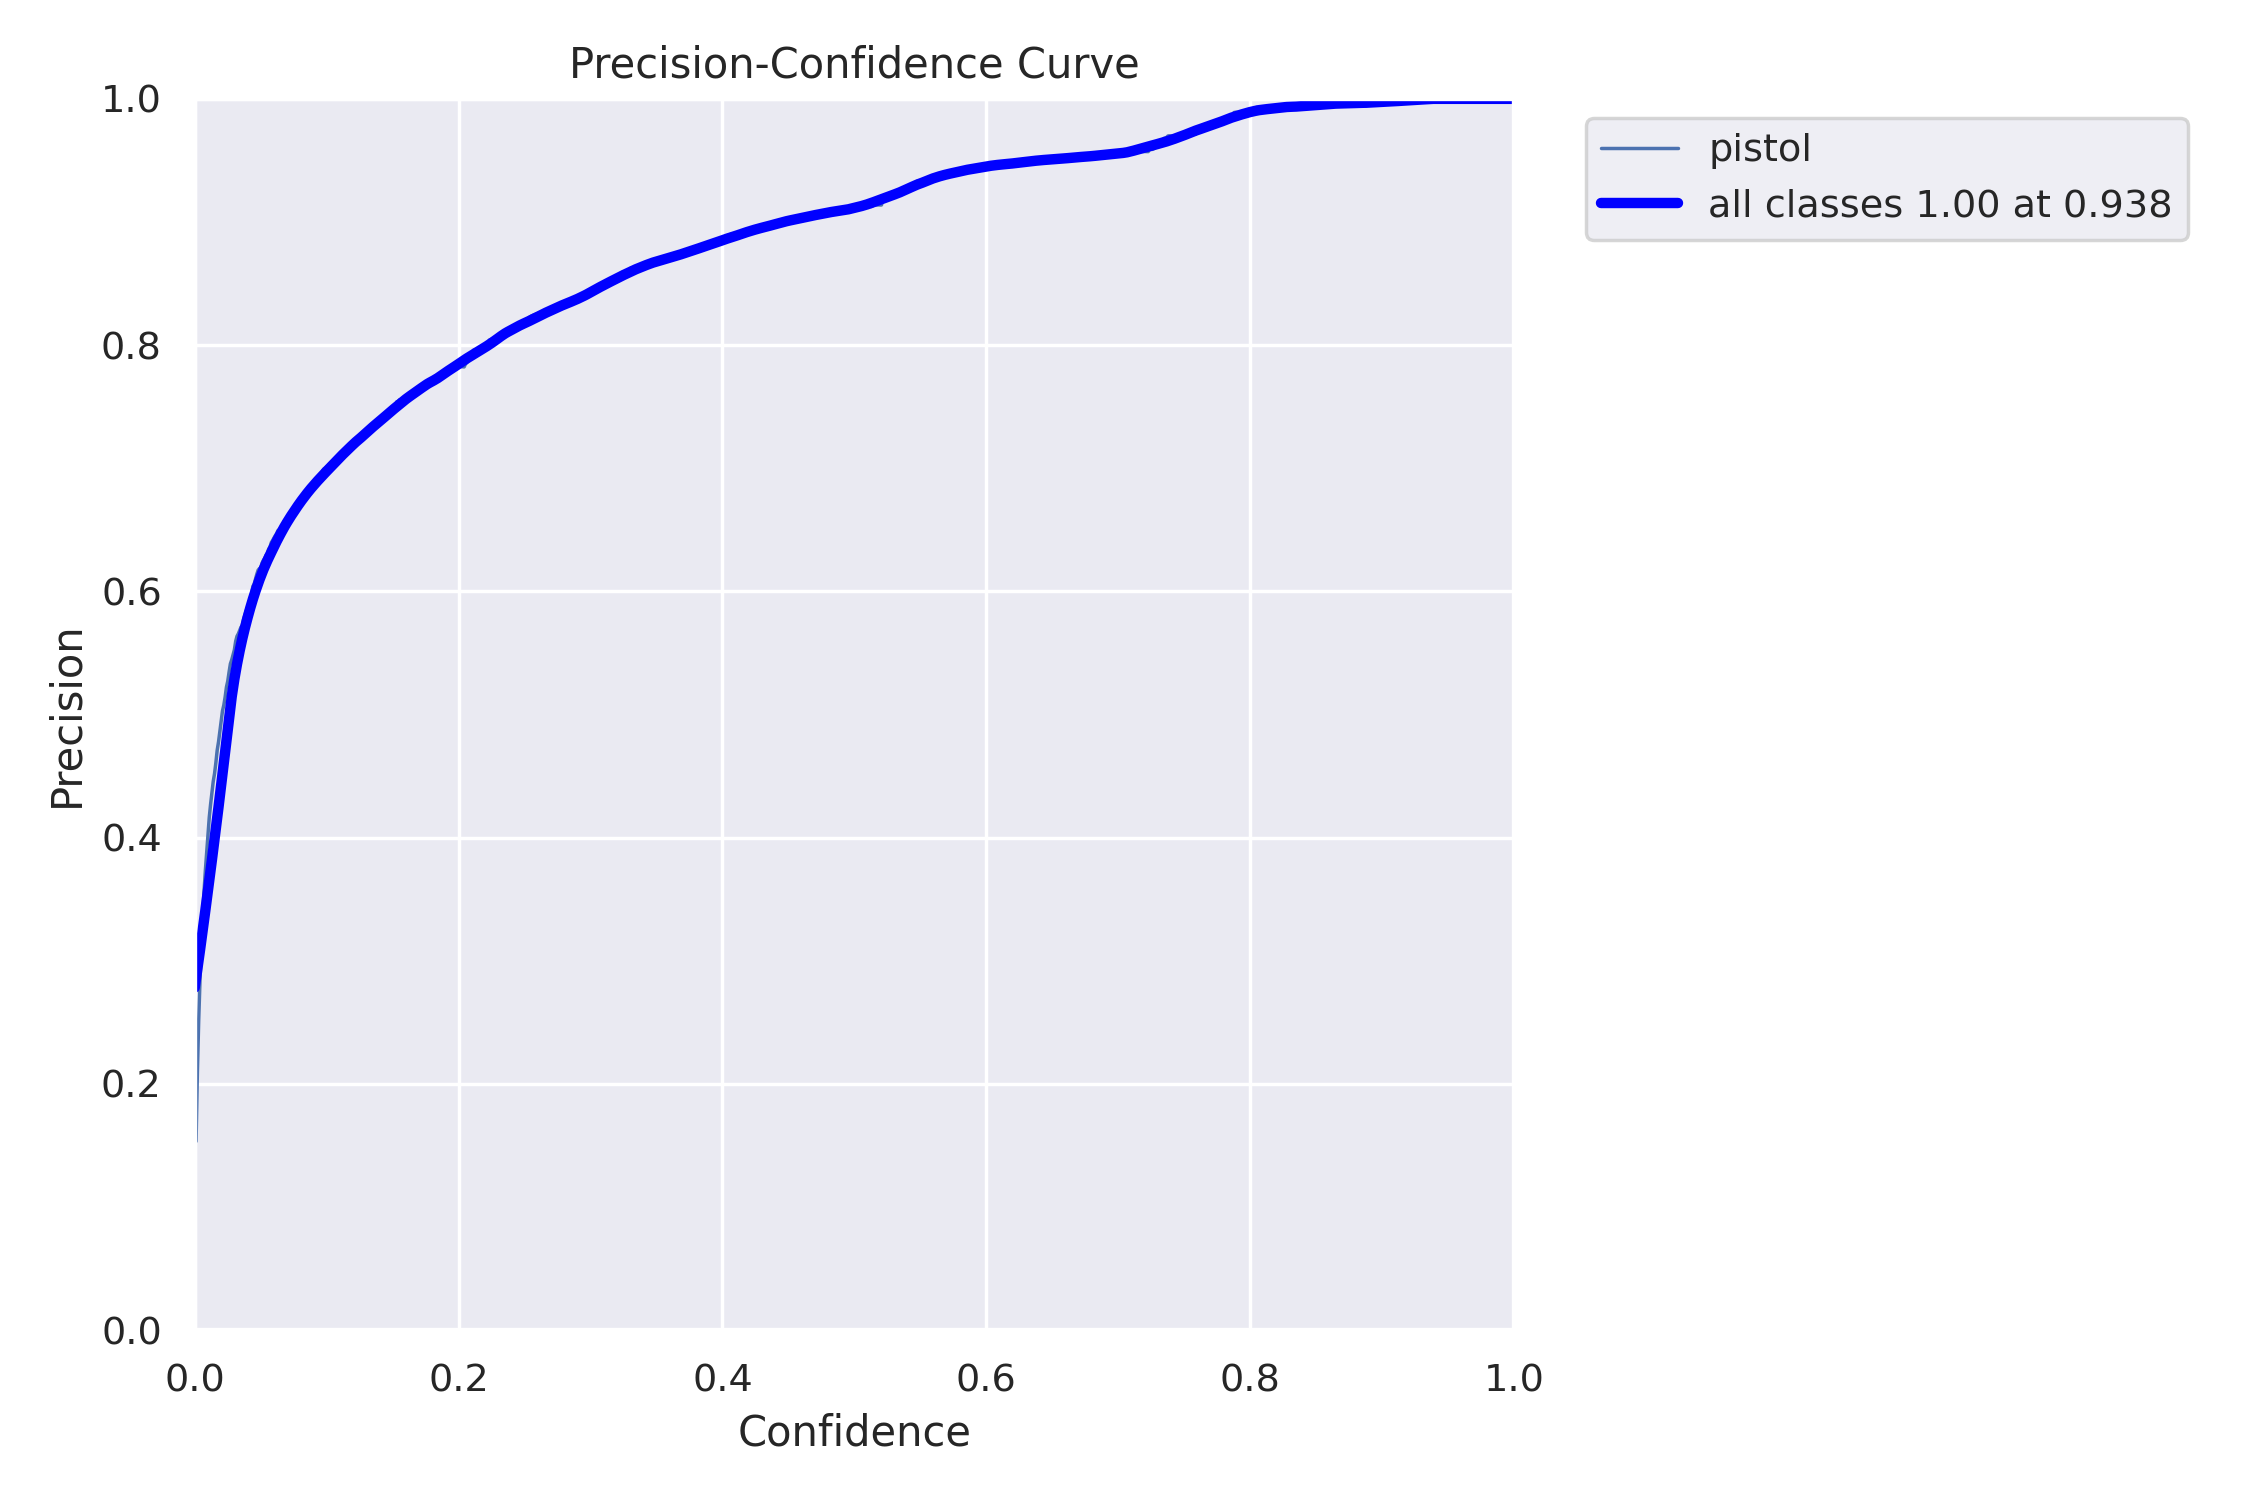

In [10]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/val/P_curve.png', width=500) 

Recall

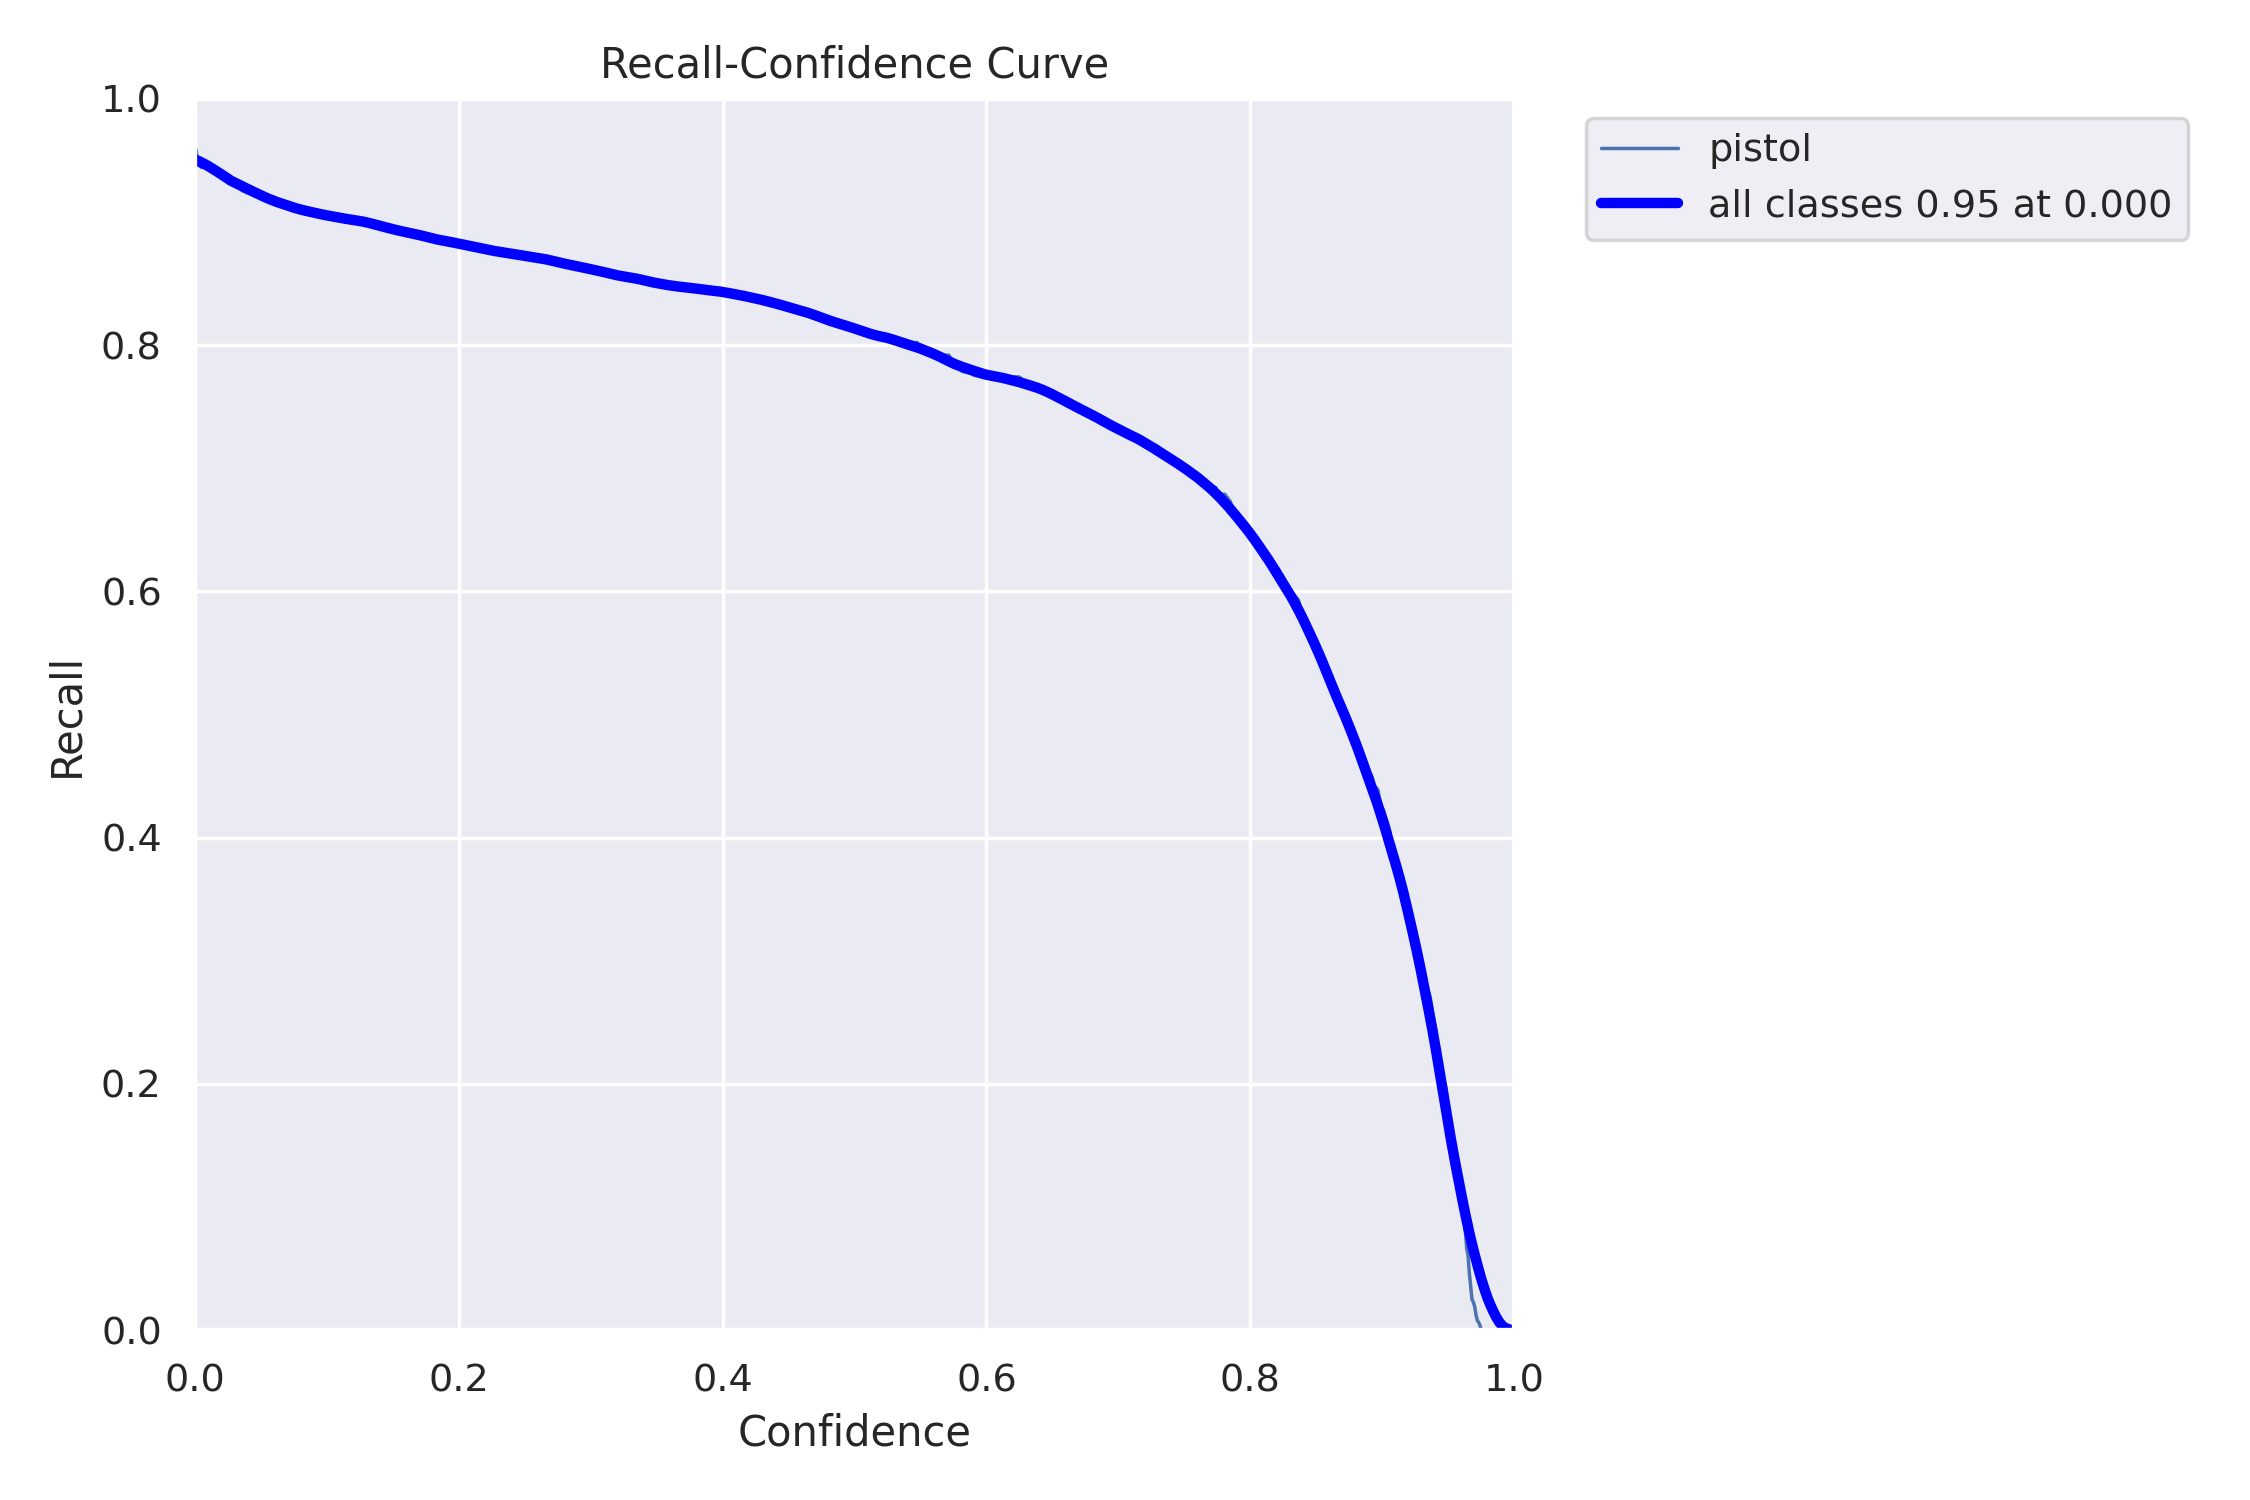

In [11]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/val/R_curve.png', width=500) 

F1

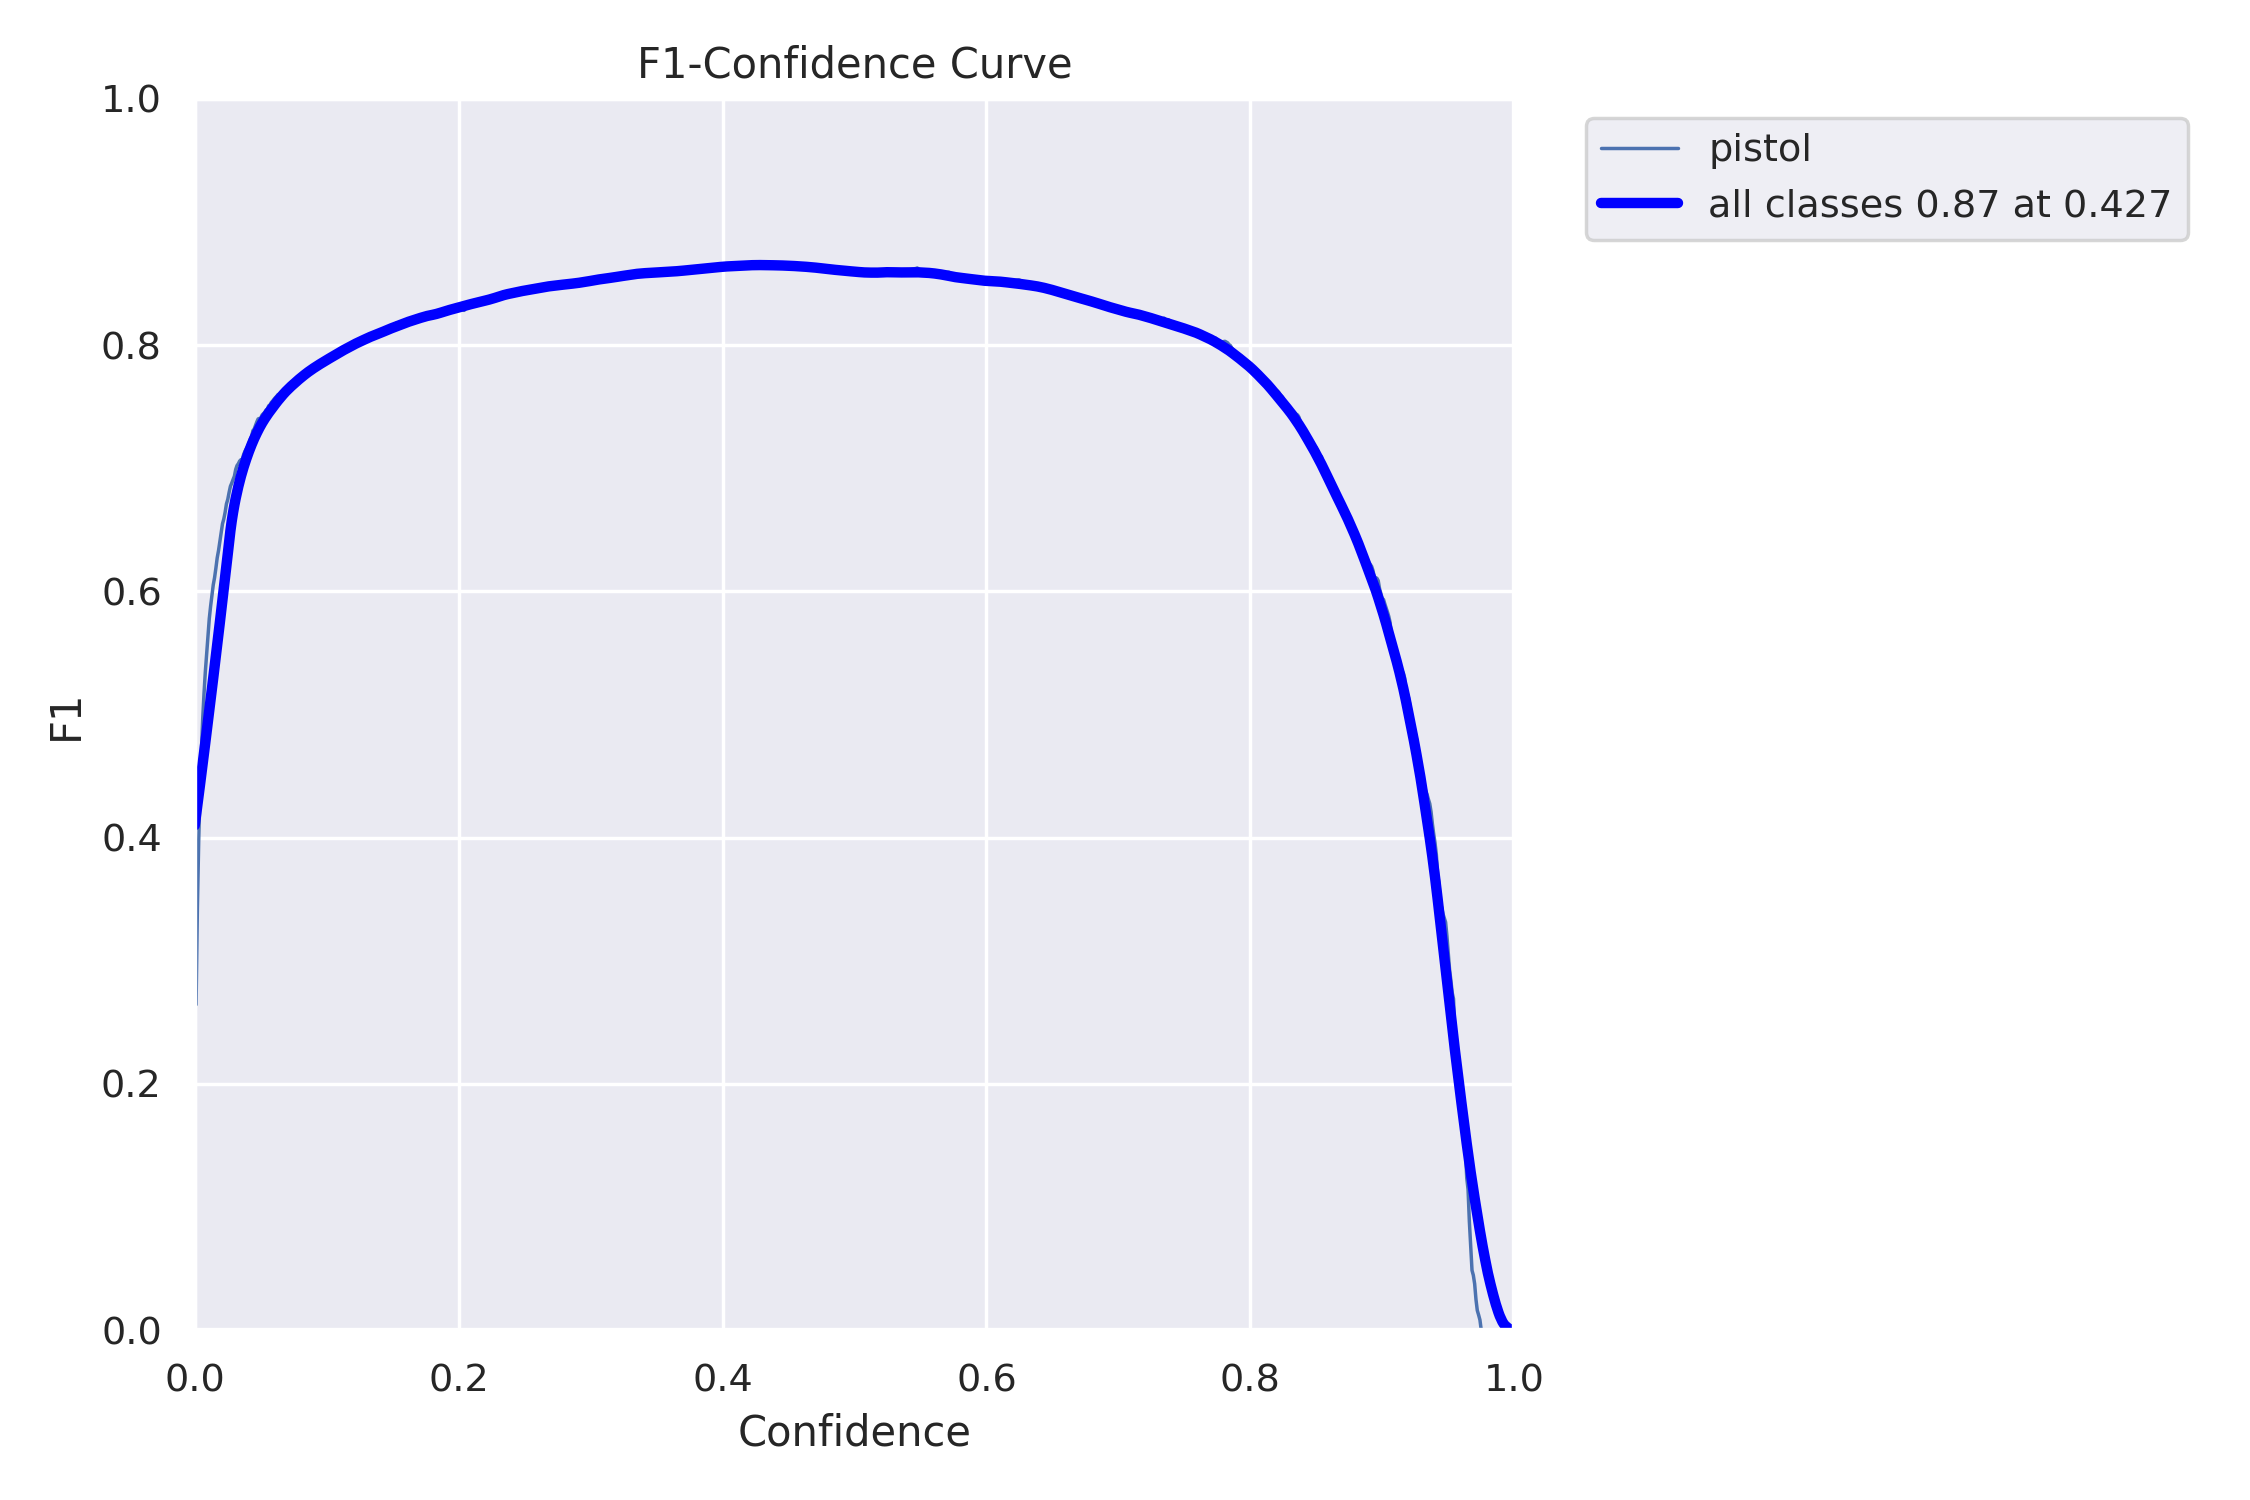

In [12]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/val/F1_curve.png', width=500) 

Precision Recall

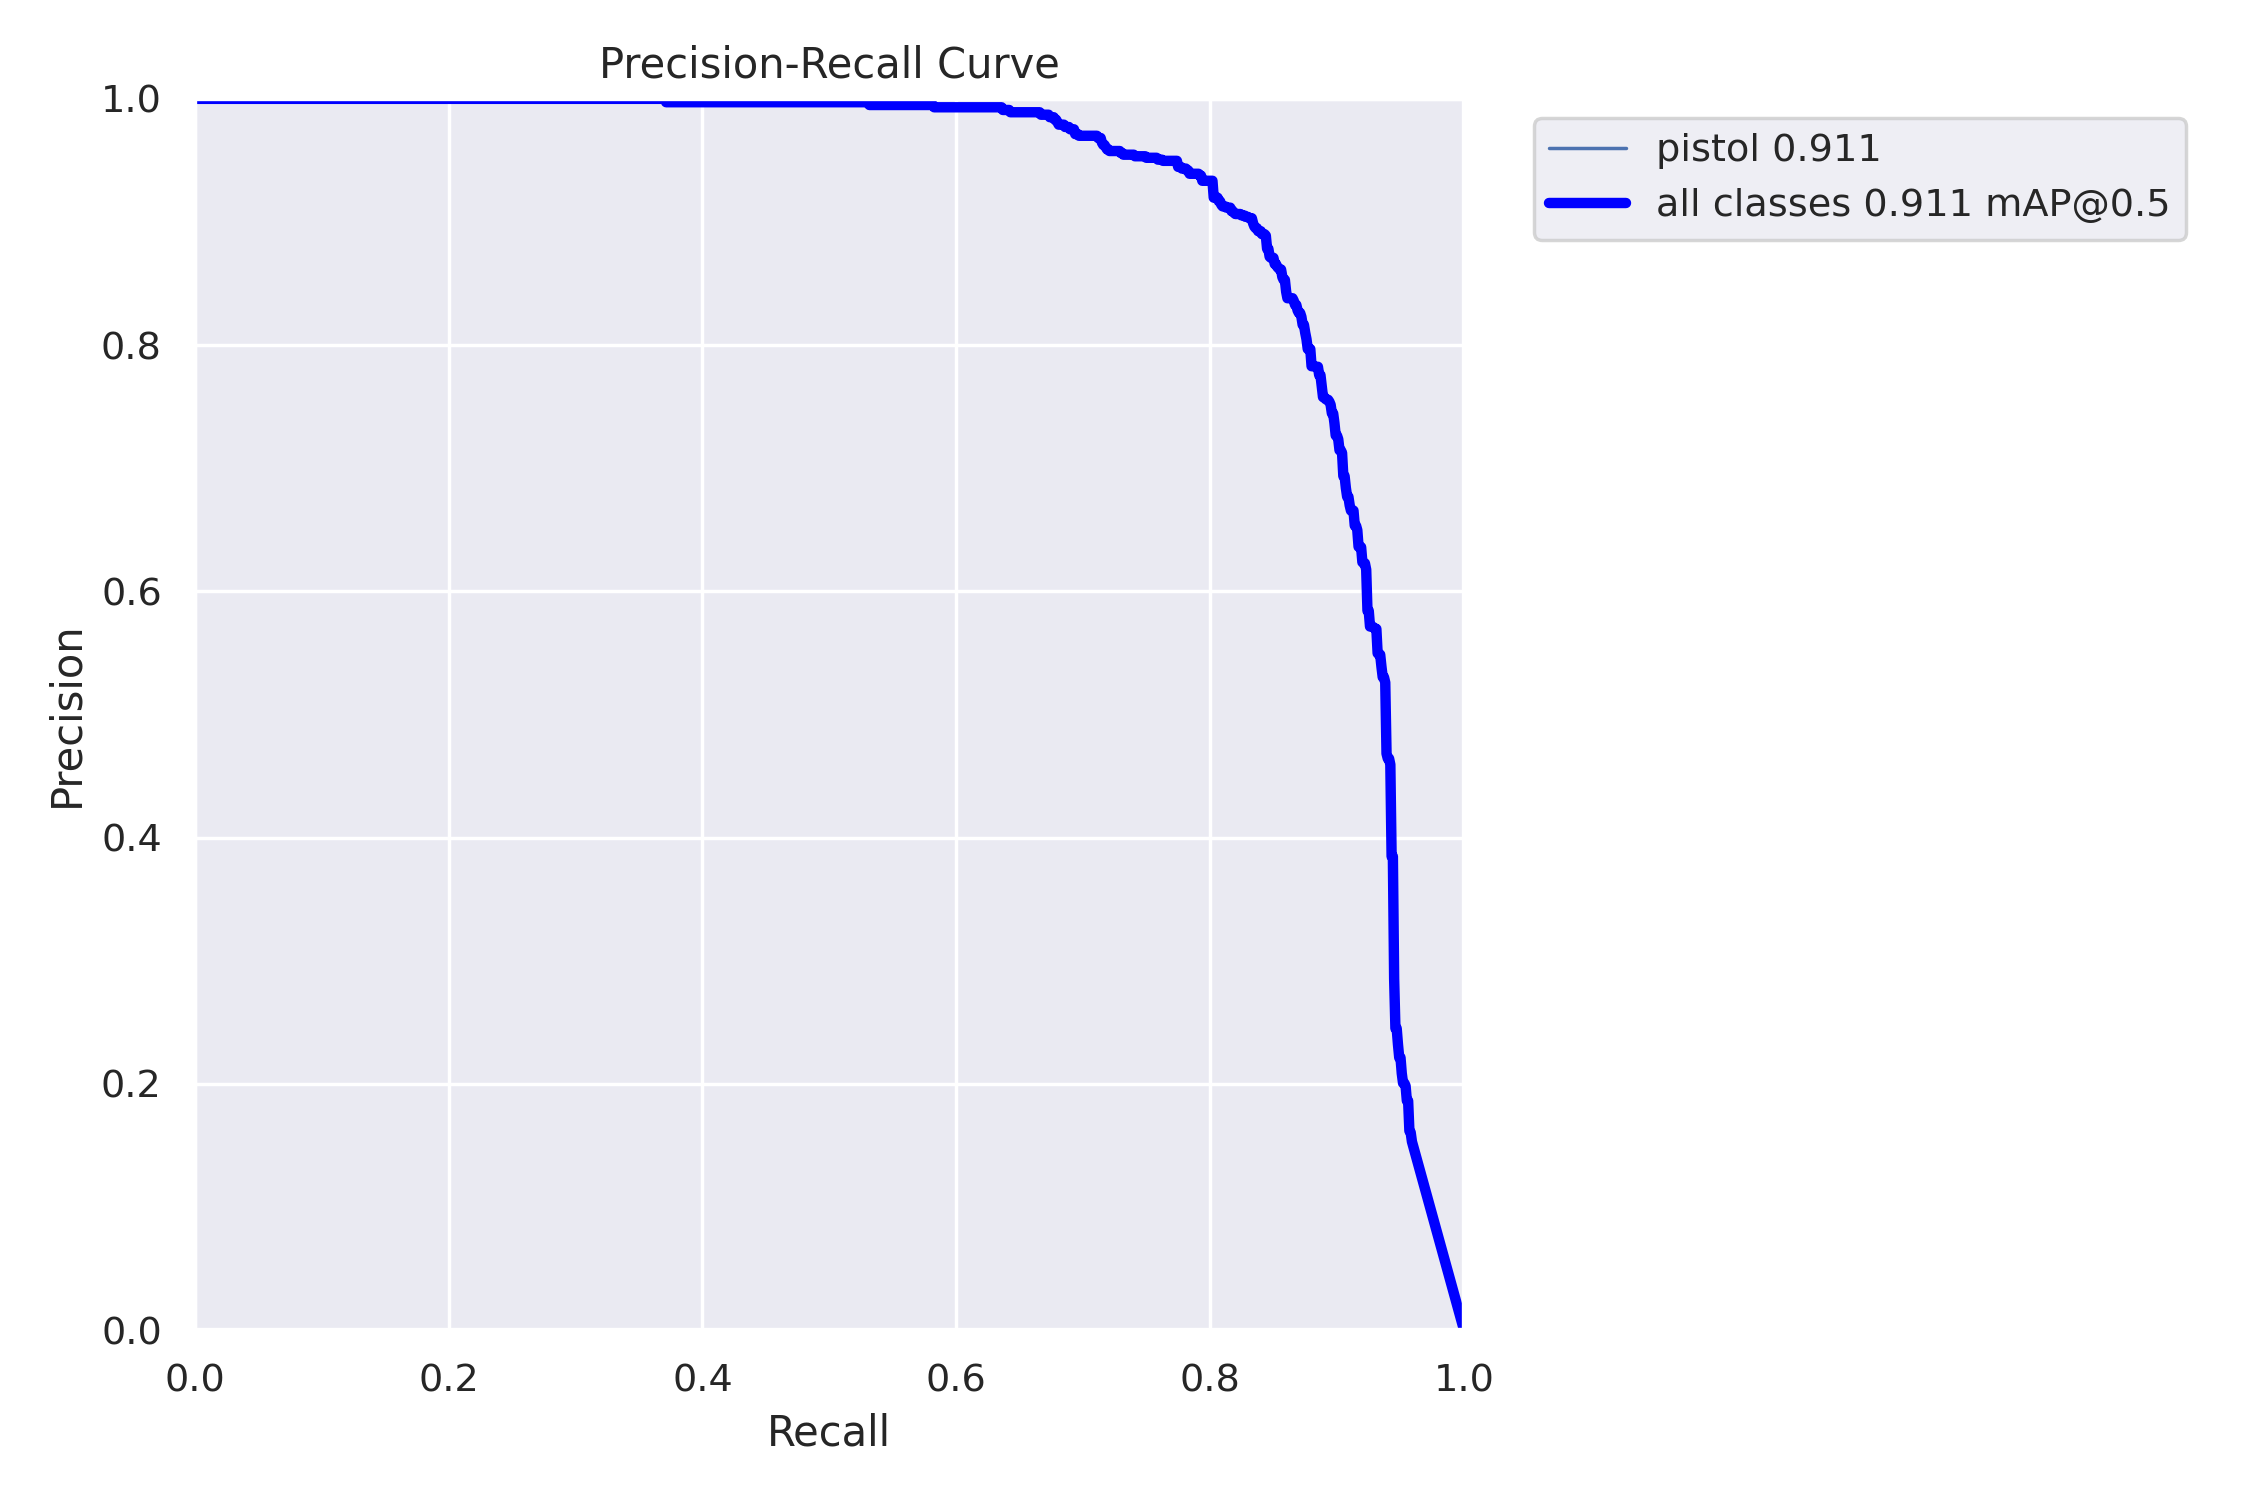

In [13]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Gun-Detection-Trial/runs/detect/val/PR_curve.png', width=500) 